# Capstone Project

## Table of contents <a name="t"></a>
* [Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location to buy a house/apartment. Specifically, this report will be targeted to stakeholders interested in buying a house/apartment in **Mexico City**, Mexico.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

#### Background

We have saved some money throughout the past years and we want to invest in Real State business. We want to buy a house in Mexico City in order to rent it, but we want to find a profitable place.

#### Where should we buy the house/apartment?

This problem is aimed to anyone who owns or who is interested in buying a house/apartment in Mexico City, and want to rent their house/aparment.

We are not able to visit all the neighborhoods in Mexico City, so we are going to use Cluster Analysis with AirBnB data in order to see the demand of rent sevice´s and use the FourSquare data location to see if there is any relation between the demand of rent sevice's and the density of venues.

## Data <a name="data"></a>
[Table of contents](#t)

AirBnB data was collected from the website called *Kaggle* which is an online community of data scientists and machine learners, owned by Google LLC. Kaggle allows users to find and publish data sets, as well as so many other things. The dataset could be downloaded in https://www.kaggle.com/tsarina/mexico-city-airbnb.

We are going to use the data of neighbourhood, latitude, longitude, room_type, price and calculated_host_listings_count columns. The first ones to make FourSquare calls and the three last to see if there is any relation as we mentioned before.

## Methodology <a name="methodology"></a>
[Table of contents](#t)

The Methodology section describe the main components of our analysis. The Methodology section comprises four stages:

1. [Collect Data](#1)
2. [Explore and Understand Data](#2)
3. [Data preparation](#3)
4. [Modeling](#4)

### 1. Collect data <a name="1"></a>
[Table of contents](#t)

In [84]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
airbnb = pd.read_csv('airmx.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14714,Private room c/ bathroom . Colonia Juarez.,57785,Diego,NaN,Cuauhtémoc,19.43035,-99.15511,Private room,478,2,0,NaN,NaN,2,327
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355
2,33681,Couple of Rooms,145672,Edubiel,NaN,Tlalpan,19.27215,-99.21848,Private room,1740,1,0,NaN,NaN,1,365
3,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3823,1,0,NaN,NaN,2,363
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334


We are going to use the data of neighbourhood, latitude, longitude, room_type, price and calculated_host_listings_count. We will drop the other ones.
We also going to rename the columns to make it more understandable.

In [27]:
columns = ['neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'calculated_host_listings_count']

airbnb = airbnb[columns]
airbnb.rename({'neighbourhood':'Neighborhood', 
            'latitude':'Latitude', 
            'longitude': 'Longitude', 
            'room_type':'Room Type', 
            'price':'Price(MXN)',
            'calculated_host_listings_count':'Rent Frequency'}, axis = 1, inplace = True)

print(airbnb.shape)
airbnb.head()

(19030, 6)


,Neighborhood,Latitude,Longitude,Room Type,Price(MXN),Rent Frequency
0,Cuauhtémoc,19.43035,-99.15511,Private room,478,2
1,Cuauhtémoc,19.44076,-99.16324,Private room,1969,9
2,Tlalpan,19.27215,-99.21848,Private room,1740,1
3,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3823,2
4,Cuauhtémoc,19.41006,-99.17645,Private room,1893,10


We only are going to use 3% of data in order to make the process faster.

In [267]:
from sklearn.model_selection import train_test_split
x_train ,air = train_test_split(airbnb,test_size=0.03, random_state=18)

print(air.shape)
air.head()

(571, 6)


,Neighborhood,Latitude,Longitude,Room Type,Price(MXN),Rent Frequency
8080,Cuauhtémoc,19.42388,-99.15489,Entire home/apt,1396,32
12395,Tlalpan,19.31051,-99.22104,Entire home/apt,5200,3
9320,Venustiano Carranza,19.42223,-99.09048,Private room,459,11
5574,Cuauhtémoc,19.43541,-99.14493,Entire home/apt,822,5
155,Cuauhtémoc,19.42984,-99.16936,Entire home/apt,956,10


In [268]:
room = pd.get_dummies(air[['Room Type']], prefix="", prefix_sep="")
air = air.drop('Room Type',1)
air = air.join(room)
air

,Neighborhood,Latitude,Longitude,Price(MXN),Rent Frequency,Entire home/apt,Private room,Shared room
8080,Cuauhtémoc,19.42388,-99.15489,1396,32,1,0,0
12395,Tlalpan,19.31051,-99.22104,5200,3,1,0,0
9320,Venustiano Carranza,19.42223,-99.09048,459,11,0,1,0
5574,Cuauhtémoc,19.43541,-99.14493,822,5,1,0,0
155,Cuauhtémoc,19.42984,-99.16936,956,10,1,0,0
13269,Cuauhtémoc,19.41209,-99.18016,401,3,0,1,0
14872,Benito Juárez,19.38897,-99.17674,803,1,0,1,0
12974,Coyoacán,19.31341,-99.15760,249,2,0,1,0
11510,Cuauhtémoc,19.43425,-99.15653,421,11,0,1,0
8677,Miguel Hidalgo,19.40626,-99.18856,1090,1,1,0,0


In [269]:
from geopy.geocoders import Nominatim

address = 'Mexico City, MX'

geolocator = Nominatim(user_agent="mx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico City are 19.4326009, -99.1333416.


In [270]:
import folium

# create map of Mexico City using latitude and longitude values
map_mx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(air['Latitude'], air['Longitude'], air['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mx)  
    
map_mx

### 2. Explore and Understand Venues in Mexico City <a name="2"></a>
[Table of contents](#t)

Creating a DataFrame with the Foursquare data.

In [70]:
CLIENT_ID = 'H5SMCQKC15A4TV2QVM4CSS1RPI4Y1P5NT0GTAQQCRU0PQXVK' # your Foursquare ID
CLIENT_SECRET = 'MTSMVHQQE2KGGBPM5AOQKKAVTETHEWGQJHD0QGBCPTW3IUXA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 300 # limit of number of venues returned by Foursquare API

radius = 1500 # define radius

In [74]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=750):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)       
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']   
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [75]:
mx_venues = getNearbyVenues(names=air['Neighborhood'], latitudes=air['Latitude'], longitudes=air['Longitude'])

Cuauhtémoc
Tlalpan
Venustiano Carranza
Cuauhtémoc
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Coyoacán
Cuauhtémoc
Miguel Hidalgo
Benito Juárez
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Coyoacán
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Cuauhtémoc
Benito Juárez
Álvaro Obregón
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Cuauhtémoc
Cuauhtémoc
Cuauhtémoc
Cuauhtémoc
Venustiano Carranza
Álvaro Obregón
Tlalpan
Venustiano Carranza
Miguel Hidalgo
Cuauhtémoc
Cuauhtémoc
Miguel Hidalgo
Cuauhtémoc
Cuauhtémoc
Tlalpan
Miguel Hidalgo
Cuauhtémoc
Tlalpan
Álvaro Obregón
Cuauhtémoc
Miguel Hidalgo
La Magdalena Contreras
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Miguel Hidalgo
Cuauhtémoc
Cuauhtémoc
Gustavo A. Madero
Miguel Hidalgo
Cuauhtémoc
Cuauhtémoc
Miguel Hidalgo
Cuauhtémoc
Miguel Hidalgo
Tlalpan
Cuauhtémoc
Coyoacán
Cuauhtémoc
Cuauhtémoc
Miguel Hidalgo
Álvaro Obregón
Miguel Hidalgo
Cuauhtémoc
Benito Juárez
Cuauhtémoc
Benito Juárez
Miguel Hidalgo
Miguel Hidalgo
Cuauhtémoc
Benito Juárez
Benito Juárez
Benito Juárez
Benito Juárez
Miguel Hid

In [441]:
print(mx_venues.shape)
mx_venues.head()

(50539, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cuauhtémoc,19.42388,-99.15489,Frody Roma,19.422273,-99.155733,Ice Cream Shop
1,Cuauhtémoc,19.42388,-99.15489,La Obra Que Sale Mal,19.425206,-99.154764,Theater
2,Cuauhtémoc,19.42388,-99.15489,Arena México,19.424187,-99.152200,Stadium
3,Cuauhtémoc,19.42388,-99.15489,Ocho Tres Cinco,19.422368,-99.155479,Venezuelan Restaurant
4,Cuauhtémoc,19.42388,-99.15489,Plaza Romita,19.423235,-99.155362,Plaza


Let's check the average price and rent frequency per Neighborhood.

In [442]:
m = air.groupby('Neighborhood').mean()[['Price(MXN)','Rent Frequency']]
m

,Price(MXN),Rent Frequency
Neighborhood,,
Azcapotzalco,1097.571429,1.428571
Benito Juárez,880.695238,1.990476
Coyoacán,617.142857,3.232143
Cuajimalpa de Morelos,1096.875000,2.000000
Cuauhtémoc,1565.620536,4.915179
Gustavo A. Madero,275.400000,5.800000
Iztacalco,3326.250000,5.000000
Iztapalapa,216.666667,2.333333
La Magdalena Contreras,549.500000,1.750000


Let's check how many venues were returned for each neighborhood

In [458]:
v = mx_venues.groupby('Neighborhood').count()
v = pd.DataFrame(v.rename({'Venue':"Venue's Density"},axis=1)["Venue's Density"]).reset_index()
v

,Neighborhood,Venue's Density
0,Azcapotzalco,375
1,Benito Juárez,10308
2,Coyoacán,4265
3,Cuajimalpa de Morelos,518
4,Cuauhtémoc,21997
5,Gustavo A. Madero,326
6,Iztacalco,252
7,Iztapalapa,99
8,La Magdalena Contreras,192
9,Miguel Hidalgo,8217


### 3. Data Preparation <a name="3"></a>
[Table of contents](#t)

In [297]:
# one hot encoding
mx_onehot = pd.get_dummies(mx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood,price and rent frequency column back to dataframe
mx_onehot['Neighborhood'] = mx_venues['Neighborhood']
mx_onehot['Latitude'] = mx_venues['Neighborhood Latitude']
mx_onehot['Longitude'] = mx_venues['Neighborhood Longitude']
mx_onehot = mx_onehot.merge(air, on = ['Latitude','Longitude']) 

# move neighborhood column to the first column
fixed_columns = [mx_onehot.columns[-6]] + [mx_onehot.columns[-5]] +  [mx_onehot.columns[-4]] + [mx_onehot.columns[-3]] + [mx_onehot.columns[-2]] + [mx_onehot.columns[-1]] + list(mx_onehot.columns[:-8])
mx_onehot = mx_onehot[fixed_columns]
mx_onehot.drop('Neighborhood_x', axis = 1, inplace = True)
mx_onehot.rename({'Neighborhood_y':'Neighborhood'}, axis = 1, inplace = True)
print(mx_onehot.shape)
mx_onehot.head()

(50539, 438)


,Neighborhood,Price(MXN),Rent Frequency,Entire home/apt,Private room,Shared room,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boarding House,Bookstore,Botanero,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Casino,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Classroom,College Football Field,College Gym,College History Building,College Library,College Quad,College Soccer Field,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Film Studio,Fire Station,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Laser Tag,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Mul

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [492]:
mx_grouped = mx_onehot.groupby('Neighborhood').agg({'Price(MXN)':'mean', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum','ATM' :'sum','Accessories Store' :'sum','Adult Boutique' :'sum','Advertising Agency' :'sum','African Restaurant' :'sum','Airport' :'sum','Airport Lounge' :'sum','Airport Service' :'sum','Airport Terminal' :'sum','American Restaurant' :'sum','Amphitheater' :'sum','Antique Shop' :'sum','Arcade' :'sum','Arepa Restaurant' :'sum','Argentinian Restaurant' :'sum','Art Gallery' :'sum','Art Museum' :'sum','Arts & Crafts Store' :'sum','Arts & Entertainment' :'sum','Asian Restaurant' :'sum','Athletics & Sports' :'sum','Auto Garage' :'sum','Auto Workshop' :'sum','Automotive Shop' :'sum','BBQ Joint' :'sum','Baby Store' :'sum','Bagel Shop' :'sum','Bakery' :'sum','Bar' :'sum','Baseball Field' :'sum','Baseball Stadium' :'sum','Basketball Court' :'sum','Bed & Breakfast' :'sum','Beer Bar' :'sum','Beer Garden' :'sum','Beer Store' :'sum','Belgian Restaurant' :'sum','Big Box Store' :'sum','Bike Rental / Bike Share' :'sum','Bike Trail' :'sum','Bistro' :'sum','Board Shop' :'sum','Boarding House' :'sum','Bookstore' :'sum','Botanero' :'sum','Boutique' :'sum','Bowling Alley' :'sum','Bowling Green' :'sum','Boxing Gym' :'sum','Brazilian Restaurant' :'sum','Breakfast Spot' :'sum','Brewery' :'sum','Bridal Shop' :'sum','Bridge' :'sum','Bubble Tea Shop' :'sum','Buffet' :'sum','Building' :'sum','Burger Joint' :'sum','Burrito Place' :'sum','Bus Line' :'sum','Bus Station' :'sum','Bus Stop' :'sum','Business Center' :'sum','Business Service' :'sum','Butcher' :'sum','Cafeteria' :'sum','Café' :'sum','Cajun / Creole Restaurant' :'sum','Camera Store' :'sum','Campground' :'sum','Candy Store' :'sum','Cantonese Restaurant' :'sum','Car Wash' :'sum','Caribbean Restaurant' :'sum','Casino' :'sum','Castle' :'sum','Cave' :'sum','Cheese Shop' :'sum','Chinese Restaurant' :'sum','Chocolate Shop' :'sum','Church' :'sum','Circus' :'sum','City Hall' :'sum','Clothing Store' :'sum','Cocktail Bar' :'sum','Coffee Shop' :'sum','College Academic Building' :'sum','College Administrative Building' :'sum','College Arts Building' :'sum','College Auditorium' :'sum','College Basketball Court' :'sum','College Bookstore' :'sum','College Cafeteria' :'sum','College Classroom' :'sum','College Football Field' :'sum','College Gym' :'sum','College History Building' :'sum','College Library' :'sum','College Quad' :'sum','College Soccer Field' :'sum','College Stadium' :'sum','College Theater' :'sum','Colombian Restaurant' :'sum','Comedy Club' :'sum','Comfort Food Restaurant' :'sum','Comic Shop' :'sum','Community Center' :'sum','Concert Hall' :'sum','Construction & Landscaping' :'sum','Convenience Store' :'sum','Convention Center' :'sum','Cosmetics Shop' :'sum','Costume Shop' :'sum','Country Dance Club' :'sum','Coworking Space' :'sum','Creperie' :'sum','Cuban Restaurant' :'sum','Cultural Center' :'sum','Cupcake Shop' :'sum','Cycle Studio' :'sum','Dance Studio' :'sum','Deli / Bodega' :'sum','Department Store' :'sum','Design Studio' :'sum','Dessert Shop' :'sum','Diner' :'sum','Discount Store' :'sum','Distillery' :'sum','Distribution Center' :'sum','Dive Bar' :'sum',"Doctor's Office" :'sum','Dog Run' :'sum','Donut Shop' :'sum','Drive-in Theater' :'sum','Drugstore' :'sum','Dry Cleaner' :'sum','Duty-free Shop' :'sum','Eastern European Restaurant' :'sum','Electronics Store' :'sum','Empanada Restaurant' :'sum','English Restaurant' :'sum','Event Service' :'sum','Event Space' :'sum','Exhibit' :'sum','Eye Doctor' :'sum','Fabric Shop' :'sum','Factory' :'sum','Falafel Restaurant' :'sum','Farm' :'sum','Farmers Market' :'sum','Fast Food Restaurant' :'sum','Festival' :'sum','Field' :'sum','Film Studio' :'sum','Fire Station' :'sum','Fish & Chips Shop' :'sum','Fish Market' :'sum','Flea Market' :'sum','Floating Market' :'sum','Flower Shop' :'sum','Food' :'sum','Food & Drink Shop' :'sum','Food Court' :'sum','Food Service' :'sum','Food Stand' :'sum','Food Truck' :'sum','Football Stadium' :'sum','Forest' :'sum','Fountain' :'sum','Frame Store' :'sum','French Restaurant':'sum','Fried Chicken Joint' :'sum','Frozen Yogurt Shop':'sum','Fruit & Vegetable Store' :'sum','Furniture / Home Store':'sum','Gaming Cafe' :'sum','Garden' :'sum','Garden Center' :'sum','Gas Station' :'sum','Gastropub' :'sum','Gay Bar' :'sum','General College & University' :'sum','General Entertainment' :'sum','German Restaurant' :'sum','Gift Shop' :'sum','Go Kart Track' :'sum','Golf Course' :'sum','Golf Driving Range' :'sum','Gourmet Shop' :'sum','Government Building' :'sum','Greek Restaurant' :'sum','Grocery Store' :'sum','Gym' :'sum','Gym / Fitness Center' :'sum','Gym Pool' :'sum','Gymnastics Gym' :'sum','Hardware Store' :'sum','Hawaiian Restaurant' :'sum','Health & Beauty Service' :'sum','Health Food Store' :'sum','Herbs & Spices Store' :'sum','Historic Site' :'sum','History Museum' :'sum','Hobby Shop' :'sum','Hockey Arena' :'sum','Home Service' :'sum','Hookah Bar' :'sum','Hospital' :'sum','Hostel' :'sum','Hot Dog Joint' :'sum','Hotel' :'sum','Hotel Bar' :'sum','Housing Development' :'sum','IT Services' :'sum','Ice Cream Shop' :'sum','Indian Restaurant' :'sum','Indoor Play Area' :'sum','Insurance Office' :'sum','Irish Pub' :'sum','Italian Restaurant' :'sum','Japanese Restaurant' :'sum','Jazz Club' :'sum','Jewelry Store' :'sum','Jewish Restaurant' :'sum','Juice Bar' :'sum','Karaoke Bar' :'sum','Kebab Restaurant' :'sum','Kids Store' :'sum','Kitchen Supply Store' :'sum','Korean Restaurant' :'sum','Laser Tag' :'sum','Latin American Restaurant' :'sum','Laundromat' :'sum','Lawyer' :'sum','Leather Goods Store' :'sum','Lebanese Restaurant' :'sum','Library' :'sum','Light Rail Station' :'sum','Lighthouse':'sum','Liquor Store' :'sum','Locksmith' :'sum','Lounge' :'sum','Luggage Store' :'sum','Market' :'sum','Martial Arts Dojo' :'sum','Massage Studio' :'sum','Medical Center' :'sum','Mediterranean Restaurant' :'sum','Memorial Site' :'sum',"Men's Store" :'sum','Metro Station' :'sum','Mexican Restaurant' :'sum','Middle Eastern Restaurant' :'sum','Middle School' :'sum','Mini Golf' :'sum','Miscellaneous Shop' :'sum','Mobile Phone Shop' :'sum','Mobility Store' :'sum','Modern European Restaurant' :'sum','Molecular Gastronomy Restaurant' :'sum','Monument / Landmark' :'sum','Moroccan Restaurant' :'sum','Motel' :'sum','Motorcycle Shop' :'sum','Mountain' :'sum','Movie Theater' :'sum','Multiplex' :'sum','Museum' :'sum','Music School' :'sum','Music Store' :'sum','Music Venue' :'sum','Nail Salon' :'sum','National Park' :'sum','Nature Preserve' :'sum','New American Restaurant' :'sum','Nightclub' :'sum','Non-Profit' :'sum','Noodle House' :'sum','North Indian Restaurant' :'sum','Office' :'sum','Opera House' :'sum','Optical Shop' :'sum','Organic Grocery' :'sum','Other Great Outdoors' :'sum','Other Nightlife' :'sum','Outdoor Event Space' :'sum','Outdoor Sculpture' :'sum','Outdoor Supply Store' :'sum','Outdoors & Recreation' :'sum','Paella Restaurant' :'sum','Paintball Field' :'sum','Pakistani Restaurant' :'sum','Palace' :'sum','Paper / Office Supplies Store' :'sum','Park' :'sum','Parking' :'sum','Pastry Shop' :'sum','Pedestrian Plaza' :'sum','Performing Arts Venue' :'sum','Perfume Shop' :'sum','Peruvian Restaurant' :'sum','Pet Café' :'sum','Pet Service' :'sum','Pet Store' :'sum','Pharmacy' :'sum','Photography Lab' :'sum','Photography Studio' :'sum','Piano Bar' :'sum','Pie Shop' :'sum','Piercing Parlor' :'sum','Pilates Studio' :'sum','Pizza Place' :'sum','Planetarium' :'sum','Playground' :'sum','Plaza' :'sum','Polish Restaurant' :'sum','Pool' :'sum','Pool Hall' :'sum','Pop-Up Shop' :'sum','Portuguese Restaurant' :'sum','Post Office' :'sum','Print Shop' :'sum','Professional & Other Places' :'sum','Pub' :'sum','Public Art' :'sum','Racetrack' :'sum','Radio Station' :'sum','Ramen Restaurant' :'sum','Record Shop' :'sum','Recording Studio' :'sum','Recreation Center' :'sum','Rental Car Location' :'sum','Residential Building (Apartment / Condo)' :'sum','Resort' :'sum','Rest Area' :'sum','Restaurant' :'sum','River' :'sum','Road' :'sum','Rock Climbing Spot' :'sum','Rock Club' :'sum','Roof Deck' :'sum','Rugby Pitch' :'sum','Russian Restaurant' :'sum','Sake Bar' :'sum','Salad Place' :'sum','Salon / Barbershop' :'sum','Salsa Club' :'sum','Sandwich Place' :'sum','Sausage Shop' :'sum','Scenic Lookout' :'sum','Science Museum' :'sum','Sculpture Garden' :'sum','Seafood Restaurant' :'sum','Shipping Store' :'sum','Shoe Repair' :'sum','Shoe Store' :'sum','Shop & Service' :'sum','Shopping Mall' :'sum','Skate Park' :'sum','Skating Rink' :'sum','Ski Area' :'sum','Ski Lodge' :'sum','Smoke Shop' :'sum','Snack Place' :'sum','Soccer Field' :'sum','Soccer Stadium' :'sum','Soup Place' :'sum','South American Restaurant' :'sum','Spa' :'sum','Spanish Restaurant' :'sum','Speakeasy' :'sum','Spiritual Center' :'sum','Sporting Goods Shop' :'sum','Sports Bar' :'sum','Sports Club' :'sum','Squash Court' :'sum','Stadium' :'sum','State / Provincial Park' :'sum','Stationery Store' :'sum','Steakhouse' :'sum','Street Art' :'sum','Street Food Gathering' :'sum','Student Center' :'sum','Supermarket' :'sum','Sushi Restaurant' :'sum','Swim School' :'sum','Swiss Restaurant' :'sum','Taco Place' :'sum','Tailor Shop' :'sum','Tapas Restaurant' :'sum','Tattoo Parlor' :'sum','Tea Room' :'sum','Tennis Court' :'sum','Thai Restaurant' :'sum','Theater' :'sum','Theme Park' :'sum','Theme Park Ride / Attraction' :'sum','Theme Restaurant' :'sum','Thrift / Vintage Store' :'sum','Town' :'sum','Toy / Game Store' :'sum','Track' :'sum','Trail' :'sum','Train Station' :'sum','Travel Lounge' :'sum','Tree' :'sum','Turkish Restaurant' :'sum','University' :'sum','Vegetarian / Vegan Restaurant' :'sum','Venezuelan Restaurant' :'sum','Veterinarian' :'sum','Video Game Store' :'sum','Video Store' :'sum','Volleyball Court' :'sum','Warehouse Store' :'sum','Water Park' :'sum','Whisky Bar' :'sum','Wine Bar' :'sum',"Women's Store":'sum','Yoga Studio':'sum','Zoo Exhibit':'sum'}).reset_index()
mx_grouped = mx_grouped.merge(v, on='Neighborhood')
columns = list(mx_grouped.columns[:3]) + [mx_grouped.columns[-1]] + list(mx_grouped.columns[3:-1])
mx_grouped = mx_grouped[columns]
mx_grouped

,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boarding House,Bookstore,Botanero,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Casino,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Classroom,College Football Field,College Gym,College History Building,College Library,College Quad,College Soccer Field,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Film Studio,Fire Station,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Laser Tag,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Musi

#### Let's see if there is any correlation between the Price(MXN) Rent Frequency and Venue's Density Columns

In [583]:
rel = mx_grouped.iloc[0:13,1:4]

corr = rel.corr(method ='pearson') 
corr

,Price(MXN),Rent Frequency,Venue's Density
Price(MXN),1.000000,0.231698,0.195663
Rent Frequency,0.231698,1.000000,0.963380
Venue's Density,0.195663,0.963380,1.000000


#### We can note that there is a strong positive linear relation between Rent Frequency and Venue's Density Columns, let's see it graphically.

Text(0.5, 1.0, "Relation Between Rent Frequency & Venue's Density")

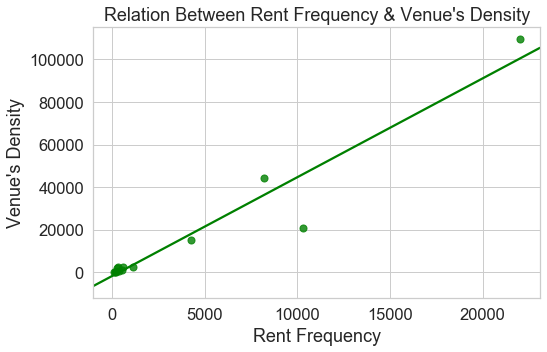

In [580]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x="Venue's Density", y='Rent Frequency', data=rel, color='green', marker = '.', scatter_kws={'s': 200},ci=None)
ax.set(xlabel='Rent Frequency', ylabel="Venue's Density")
ax.set_title("Relation Between Rent Frequency & Venue's Density")

#### Let's print each neighborhood along with the top 10 most common venues

In [372]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[6:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [493]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mx_grouped['Neighborhood']

for ind in np.arange(mx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mx_grouped.iloc[ind, :], num_top_venues)

In [494]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Azcapotzalco,Mexican Restaurant,Taco Place,Bakery,Convenience Store,Restaurant
1,Benito Juárez,Mexican Restaurant,Coffee Shop,Taco Place,Ice Cream Shop,Bakery
2,Coyoacán,Mexican Restaurant,Taco Place,Café,Coffee Shop,Ice Cream Shop
3,Cuajimalpa de Morelos,Mexican Restaurant,Coffee Shop,Taco Place,Pizza Place,Ice Cream Shop
4,Cuauhtémoc,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop


### 4. Modeling <a name="4"></a>
[Table of contents](#t)

Run *k*-means to cluster the neighborhood into 5 clusters.

In [495]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

mx_grouped_clustering = mx_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 4, 0, 1, 0, 0, 0, 0, 2])

In [496]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mx_merged = air
mx_merged = mx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mx_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Price(MXN),Rent Frequency,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8080,Cuauhtémoc,19.42388,-99.15489,1396,32,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
12395,Tlalpan,19.31051,-99.22104,5200,3,1,0,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
9320,Venustiano Carranza,19.42223,-99.09048,459,11,0,1,0,0,Mexican Restaurant,Taco Place,Pizza Place,Gym,Shared room
5574,Cuauhtémoc,19.43541,-99.14493,822,5,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
155,Cuauhtémoc,19.42984,-99.16936,956,10,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop


Finally, let's visualize the resulting clusters

In [581]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mx_merged['Latitude'], mx_merged['Longitude'], mx_merged['Neighborhood'], mx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4.1 Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

In [448]:
import matplotlib.pyplot as plt

#### Cluster 1

In [504]:
c1 = mx_merged.loc[mx_merged['Cluster Labels'] == 0, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
col = list(c1.columns[:3]) + [c1.columns[-1]] + list(c1.columns[3:-1]) 
c1 = c1[col]
print(c1.shape)
c1.head()

(95, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Tlalpan,5200,3,1128,1,0,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
1,Tlalpan,994,2,1128,0,1,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
2,Tlalpan,478,1,1128,0,1,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
3,Tlalpan,2600,4,1128,0,1,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
4,Tlalpan,497,1,1128,0,1,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant


In [505]:
c1g = c1.groupby('Neighborhood').agg({'Price(MXN)':'mean',"Venue's Density":'max', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
c1g

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Azcapotzalco,1097.571429,375,10,5,2,0
Cuajimalpa de Morelos,1096.875000,518,16,6,2,0
Gustavo A. Madero,275.400000,326,29,0,4,1
Iztacalco,3326.250000,252,20,3,1,0
Iztapalapa,216.666667,99,7,0,3,0
La Magdalena Contreras,549.500000,192,7,1,3,0
Tlalpan,974.950000,1128,50,6,14,0
Venustiano Carranza,468.300000,579,37,5,4,1
Xochimilco,481.800000,199,10,2,3,0


#### Cluster 2

In [506]:
c2 = mx_merged.loc[mx_merged['Cluster Labels'] == 1, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
c2 = c2[col]
print(c2.shape)
c2.head()

(224, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Cuauhtémoc,1396,32,21997,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
1,Cuauhtémoc,822,5,21997,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
2,Cuauhtémoc,956,10,21997,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
3,Cuauhtémoc,401,3,21997,0,1,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
4,Cuauhtémoc,421,11,21997,0,1,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop


In [507]:
c2g = c2.groupby('Neighborhood').agg({'Price(MXN)':'mean', "Venue's Density":'max','Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
c2g

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Cuauhtémoc,1565.620536,21997,1101,126,92,6


#### Cluster 3

In [508]:
c3 = mx_merged.loc[mx_merged['Cluster Labels'] == 2, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
c3 = c3[col]
print(c3.shape)
c3.head()

(91, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Miguel Hidalgo,1090,1,8217,1,0,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Bakery
1,Miguel Hidalgo,401,9,8217,0,1,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Bakery
2,Miguel Hidalgo,2485,33,8217,1,0,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Bakery
3,Miguel Hidalgo,382,1,8217,0,1,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Bakery
4,Miguel Hidalgo,593,1,8217,0,1,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Bakery


In [509]:
c3g = c3.groupby('Neighborhood').agg({'Price(MXN)':'mean', "Venue's Density":'max', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
c3g

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Miguel Hidalgo,1341.098901,8217,487,54,35,2


#### Cluster 4

In [510]:
c4 = mx_merged.loc[mx_merged['Cluster Labels'] == 3, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
c4 = c4[col]
print(c4.shape)
c4.head()

(105, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Benito Juárez,803,1,10308,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Ice Cream Shop,Bakery
1,Benito Juárez,478,1,10308,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Ice Cream Shop,Bakery
2,Benito Juárez,344,1,10308,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Ice Cream Shop,Bakery
3,Benito Juárez,325,1,10308,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Ice Cream Shop,Bakery
4,Benito Juárez,249,1,10308,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Ice Cream Shop,Bakery


In [511]:
c4g = c4.groupby('Neighborhood').agg({'Price(MXN)':'mean', "Venue's Density":'max', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
c4g

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Benito Juárez,880.695238,10308,209,42,62,1


#### Cluster 5

In [512]:
c5 = mx_merged.loc[mx_merged['Cluster Labels'] == 4, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
c5 = c5[col]
print(c5.shape)
c5.head()

(56, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Coyoacán,249,2,4265,0,1,0,4,Mexican Restaurant,Taco Place,Café,Coffee Shop,Ice Cream Shop
1,Coyoacán,497,17,4265,1,0,0,4,Mexican Restaurant,Taco Place,Café,Coffee Shop,Ice Cream Shop
2,Coyoacán,765,1,4265,1,0,0,4,Mexican Restaurant,Taco Place,Café,Coffee Shop,Ice Cream Shop
3,Coyoacán,191,1,4265,0,1,0,4,Mexican Restaurant,Taco Place,Café,Coffee Shop,Ice Cream Shop
4,Coyoacán,401,1,4265,1,0,0,4,Mexican Restaurant,Taco Place,Café,Coffee Shop,Ice Cream Shop


In [513]:
cg5 = c5.groupby('Neighborhood').agg({'Price(MXN)':'mean', "Venue's Density":'max', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
cg5

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Coyoacán,617.142857,4265,181,17,38,1


## Results and Discussion <a name="results"></a>
[Table of contents](#t)

In our Cluster Analysis we found that there are three clusters (cluster 2, cluster 3 and cluster 4) that even though they have diffent average price and rent frequency, they all seem to be profitable places to buy house based on the average price and the venues density.

We also have got that there's a positive linear regression between rent frequency and venue's density (Pearson Correlation Coefficient of 0.96), so we can leave out the rent frequency variable and just analize the venues density variable. This could be helpful if we do not have the rent frequency data for a given zone.

The most profitable cluster seem to be the cluster 2 which is the one with the higuest average price and venue's density, so this makes cluster 2 the best decision out of all of clusters. 

## Conclusion <a name="conclusion"></a>
[Table of contents](#t)

Purpose of this project was to identify Mexico City places where would be profitable to buy a house in a high density of venues zone in order to aim stakeholders in narrowing down the search for optimal location for a new house. By calculating venues density distribution from Foursquare data we have first identified general neighborhoods that justify further analysis, and then generated extensive collection of locations from our AirBnB dataset. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of Rent Frequency ).

Final decission on optimal house location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.